## Task 1.

#### Formulation:
Let:

$N$ - number of observations

$B$ - number of beacons

$R$ - number of robot's positions

beacons[i] = $b_i$

robots[i] = $r_i$

We have system of equations: 
$$\left\{\begin{matrix}
x(b_i) - x(r_i) = x_i\\
y(b_i) - y(r_i) = y_i 
\end{matrix}\right.$$
<c>for $$i = 1, \dots, N$$

Let $A$ is a matrix size of $N \times (B+R)$, such that: $a_{i, b_i} = 1$ and $a_{i, B+r_i} =-1$ (the rest equal 0). Then we can reformulate our initial system as:

$$\left\{\begin{matrix}
Ac=x\\ 
Ad=y
\end{matrix}\right.$$


where $c = \left[ x(b^1),\dots, x(b^B),x(r^1),\dots, x(r^R)\right]^T$ and $d = \left[ y(b^1),\dots, y(b^B),y(r^1),\dots, y(r^R)\right]^T$,

$(x(b^j),y(b^j))$ -coordinates of beacon number $j\qquad$ ( $ j = 1, \dots,B$)

$(x(r^j),y(r^j))$ -coordinates of robot position number $j\qquad$ ($j = 1, \dots,R$)

Therefore, the solution using <i><b>numpy.linalg.lstsq</i></b> (solutions could be found separately because of independence):

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.sparse import csr_matrix
import scipy.linalg as la

mat_contents = sio.loadmat('task1.mat')

beacons = mat_contents['beacons']
robots = mat_contents['robots']
x = mat_contents['x']
y = mat_contents['y']

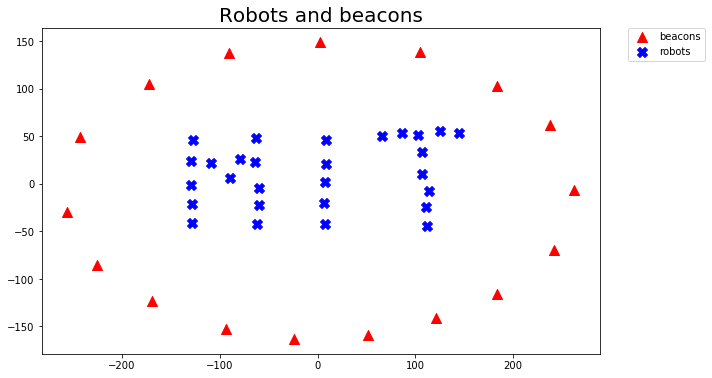

In [2]:
R = len(np.unique(robots))
B = len(np.unique(beacons))
N = len(x)
A = np.zeros((N, B+R))

for i in range(N):
    A[i, beacons[i]-1] = 1
    A[i, B + robots[i]-1] = -1

c = la.lstsq(A, x)[0]
d = la.lstsq(A, y)[0]

fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons', fontsize=20)
plt.scatter(c[:B], d[:B],s=100,marker='^', label='beacons', c='r')
plt.scatter(c[B:], d[B:],s=100,marker='X',label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Least-squares solution to a linear matrix equation obtained by optimization problems:

$$min_c \left\|Ac-x\right\|^2_2$$

$$min_d \left\|Ad-y\right\|^2_2$$

Analytical solutions would be: 
$$c=(A^TA)^{-1}A^Tx$$

$$d=(A^TA)^{-1}A^Ty$$

Let's try <i>scipy.linalg.inv</i>:

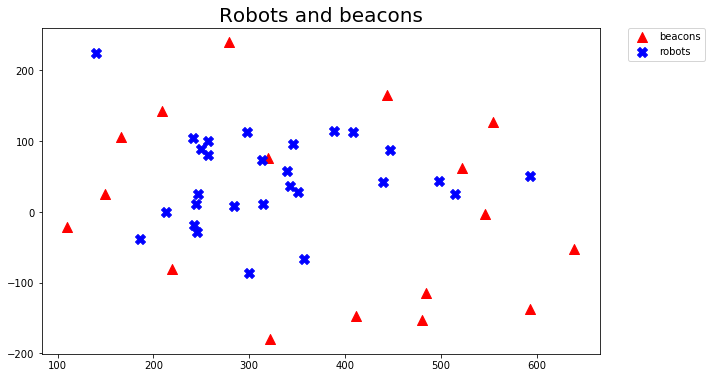

In [3]:
c = la.inv(A.T.dot(A)).dot(A.T).dot(x)
d = la.inv(A.T.dot(A)).dot(A.T).dot(y)

fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons', fontsize=20)
plt.scatter(c[:B], d[:B],s=100,marker='^', label='beacons', c='r')
plt.scatter(c[B:], d[B:],s=100,marker='X',label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>scipy.linalg.inv</b> fails

## Task 2.

In [4]:
mat_contents = sio.loadmat('task2.mat')

beacons = mat_contents['beacons']
robots = mat_contents['robots']
x = mat_contents['x']
y = mat_contents['y']

#### Least-squares problem (perfectly oriented):

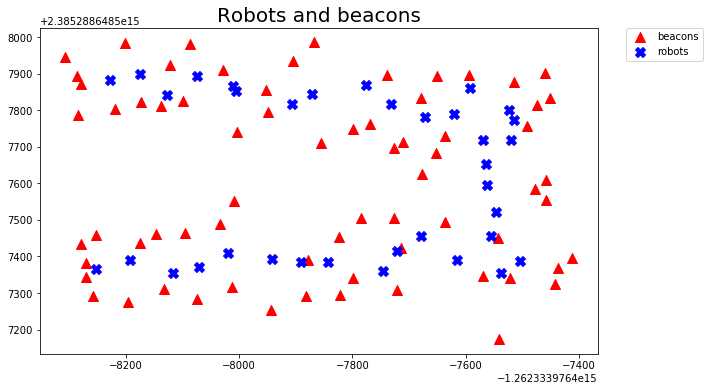

In [5]:
R = len(np.unique(robots))
B = len(np.unique(beacons))
N = len(x)
A = np.zeros((N, B+R))

for i in range(N):
    A[i, beacons[i]-1] = 1
    A[i, B + robots[i]-1] = -1

c = la.lstsq(A, x)[0]
d = la.lstsq(A, y)[0]

fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons', fontsize=20)
plt.scatter(c[:B], d[:B],s=100,marker='^', label='beacons', c='r')
plt.scatter(c[B:], d[B:],s=100,marker='X',label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In this case we have such system of equations:
$$\left\{\begin{matrix}
x(b_i) - x(r_i) = cos\alpha_{r_i} x_i+ sin \alpha_{r_i} y_i\\
y(b_i) - y(r_i) = -sin\alpha_{r_i}x_i + cos\alpha_{r_i}y_i 
\end{matrix}\right.$$
<c>for $$i = 1, \dots, N $$where $\alpha_{r_i}$ - angle in position robots[i]


Now we have comlicated variable $\omega = \left[ x(b^1),\dots, x(b^B),x(r^1),\dots, x(r^R), y(b^1),\dots, y(b^B),y(r^1),\dots, y(r^R),\alpha_{1},\dots,\alpha_{R}\right]^T$
 
Residuals functions:
$$f_i^x =  x(b_i) - x(r_i) - cos\alpha_{r_i} x_i- sin \alpha_{r_i} y_i$$
$$f_i^y =  y(b_i) - y(r_i) + sin\alpha_{r_i}x_i - cos\alpha_{r_i}y_i $$

The problem would be then:
$$min_\omega F(\omega) = min_\omega \left\| \begin{pmatrix}
f^x\\ 
f^y
\end{pmatrix}  \right\|^2_2$$

Jacobian $J$ is a matrix of size $2N \times (2B+3R)$:

$$ j_{k,l} = \frac{\partial f_k^x}{\partial \omega_l}\qquad \text{ if} \quad  k \leq N$$, 

and  $$ j_{k,l} = \frac{\partial f_k^y}{\partial \omega_l}\qquad \text{ if} \quad k > N$$

Thus, in each row we have only three non zero elements: derivative w.r.t coordinate of beacon (this derivative equals to $1$), derivative w.r.t coordinate of robot(this derivative is always equal to $-1$) and derivative w.r.t $\alpha$: 

$$\frac{\partial f_i^x}{\partial x(b_i)} = 1 \qquad \frac{\partial f_i^x}{\partial x(r_i)} = -1$$

$$\frac{\partial f_i^x}{\partial \alpha_{r_i}} = sin\alpha_{r_i} x_i - cos \alpha_{r_i} y_i \qquad \text{for firs part of matrix}$$ 

$$\frac{\partial f_i^y}{\partial y(b_i)} = 1 \qquad \frac{\partial f_i^y}{\partial y(r_i)} = -1$$

$$\frac{\partial f_i^y}{\partial \alpha_{r_i}} = cos\alpha_{r_i} x_i  + sin \alpha_{r_i} y_i\qquad \text{for second part of matrix}$$

I will use solution from Least-squares problem (perfectly oriented) with zeros as angles as initial solution:

In [6]:
from scipy import optimize as opt

def residual(w):
    global x
    global y
    global A
    M = A.shape[1]
    w_1 = w[:M]  ## beacons
    w_2 = w[M:2*M] ##robots
    w_3 = w[2*M:] ##angles
    f_x = np.atleast_2d(A.dot(w_1)).T - x * np.cos(w_3[robots-1]) - y * np.sin(w_3[robots-1])
    f_y = np.atleast_2d(A.dot(w_2)).T + x * np.sin(w_3[robots-1]) - y * np.cos(w_3[robots-1])
    f = np.concatenate((f_x, f_y), axis=0).reshape((-1,))
    return f

def Jacobian(w):
    global x
    global y
    global A
    global robots
    N, M = A.shape 
    R = len(np.unique(robots))
    J = np.zeros((2*N, len(w)))
    J[:N, :M] = A
    J[N:, M:2*M] = A
    J[:N, M:2*M] = np.zeros((N, M))
    J[N:, :M] = np.zeros((N, M))
    
    tmp = np.zeros((N, R))
    for i in range(N):
        alpha = w[2*M + robots[i] - 1]
        tmp[i, robots[i]-1] = x[i]*np.sin(alpha) - y[i]*np.cos(alpha)
    J[:N, 2*M:] = tmp
    
    tmp = np.zeros((N, R))
    for i in range(N):
        alpha = w[2*M + robots[i] - 1]
        tmp[i, robots[i]-1] = x[i]*np.cos(alpha) + y[i]*np.sin(alpha)
    J[N:, 2*M:] = tmp
    
    return J

In [7]:
sol = np.concatenate((c, d), axis=0).reshape((-1,))
sol = np.concatenate((sol, np.zeros(R)), axis=0)
w = opt.root(residual, sol, jac=Jacobian, method='lm').x

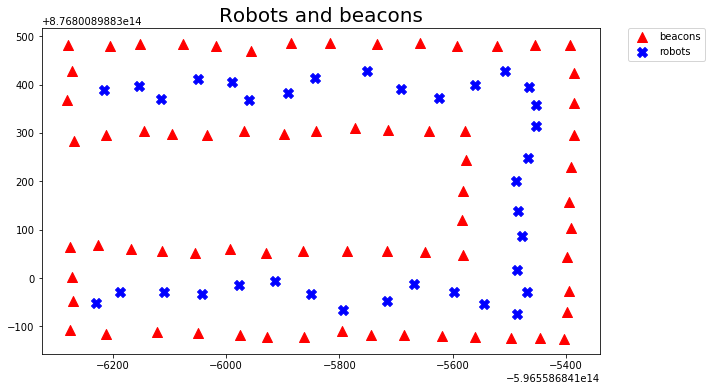

In [8]:
fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons', fontsize=20)
plt.scatter(w[:B], w[B+R:2*B+R],s=100,marker='^',label='beacons', c='r')
plt.scatter(w[B:B+R], w[2*B+R:2*B+2*R],s=100,marker='X', label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Much better.

## Task 3.

In [9]:
mat_contents = sio.loadmat('task3.mat')

beacons = mat_contents['beacons']
robots = mat_contents['robots']
x = mat_contents['x']
y = mat_contents['y']

#### Least-squares problem (perfectly oriented):

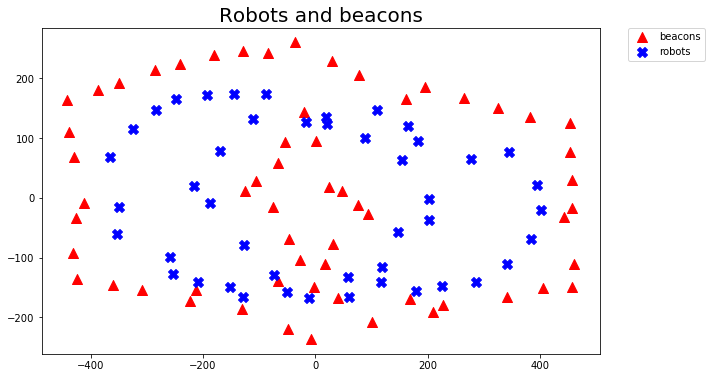

In [10]:
R = len(np.unique(robots))
B = len(np.unique(beacons))
N = len(x)
A = np.zeros((N, B+R))

for i in range(N):
    A[i, beacons[i]-1] = 1
    A[i, B + robots[i]-1] = -1

c = la.lstsq(A, x)[0]
d = la.lstsq(A, y)[0]

fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons', fontsize=20)
plt.scatter(c[:B], d[:B],s=100,marker='^', label='beacons', c='r')
plt.scatter(c[B:], d[B:],s=100,marker='X',label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The number of errors is relatively small, therefore i will use Huber Robust loss function.

#### Huber Robust loss function:

$$Huber (\gamma, r) = \left\{\begin{matrix}
\infty \qquad,\gamma<0\\ 
\frac{1}{2} r^2 \qquad, \left | r \right | \leq \gamma\\ 
\gamma( \left | r \right | -\frac{1}{2} \gamma ) \quad, \left | r \right | > \gamma
\end{matrix}\right.$$

Then we have oprimization problem:

$$min_\omega F(\omega) = min_\omega \sum_{i=1}^{N} \left [ Huber(\gamma, x(b_i) - x(r_i) - cos\alpha_{r_i} x_i- sin \alpha_{r_i} y_i) + Huber(\gamma, y(b_i) - y(r_i) + sin\alpha_{r_i}x_i - cos\alpha_{r_i}y_i) \right] = \\
= min_\omega \sum_{i=1}^{N} \left [ Huber(\gamma, f^x_i) + Huber(\gamma, f^y_i) \right]$$

Let's try do compute gradient of the residual function:

$$F(\omega) = \sum_{i=1}^{N} \left [ Huber(\gamma, x(b_i) - x(r_i) - cos\alpha_{r_i} x_i- sin \alpha_{r_i} y_i) + Huber(\gamma, y(b_i) - y(r_i) + sin\alpha_{r_i}x_i - cos\alpha_{r_i}y_i) \right] =\\=\sum_{i=1}^{N} \left [ Huber(\gamma, f^x_i) + Huber(\gamma, f^y_i) \right]$$

$$f_i^x =  x(b_i) - x(r_i) - cos\alpha_{r_i} x_i- sin \alpha_{r_i} y_i$$
$$f_i^y =  y(b_i) - y(r_i) + sin\alpha_{r_i}x_i - cos\alpha_{r_i}y_i $$

$$\omega = \left[ x(b^1),\dots, x(b^B),x(r^1),\dots, x(r^R), y(b^1),\dots, y(b^B),y(r^1),\dots, y(r^R),\alpha_{1},\dots,\alpha_{R}\right]^T$$

$$\bigtriangledown F=\frac{\partial F}{\partial \omega} = \left( \frac{\partial F}{\partial x(b^1)}, \dots, \frac{\partial F}{\partial x(b^B)},\frac{\partial F}{\partial x(r^1)}, \dots, \frac{\partial F}{\partial x(r^R)} ,\frac{\partial F}{\partial y(b^1)}, \dots, \frac{\partial F}{\partial y(b^B)} ,\frac{\partial F}{\partial y(r^1)}, \dots, \frac{\partial F}{\partial y(r^R)} ,\frac{\partial F}{\partial \alpha_1}, \dots, \frac{\partial F}{\partial \alpha_R } \right)$$

1)  for $\partial x(b^k)$:

$$\frac{\partial F}{\partial x(b^k)} =\frac {\partial \sum_{i=1}^{N} \left [ Huber(\gamma, f^x_i) + Huber(\gamma, f^y_i) \right] }{\partial x(b^k)} = \sum_{i=1}^N \left( \frac{\partial H(f^x_i)}{\partial x(b^k)} + \frac{\partial H(f^y_i)}{\partial x(b^k)} \right) = \sum_{i=1}^N  \frac{\partial H(f^x_i)}{\partial x(b^k)}$$, where $$\frac{\partial H(f^x_i)}{\partial x(b^k)} 
=  \left\{\begin{matrix} 
\frac{\partial (\frac{1}{2} (f^x_i)^2)}{\partial x(b^k)}, \quad  if \quad \left| f^x_i\right|\leq \gamma\\
\frac{\partial (\gamma(\left| f^x_i\right|-\frac{1}{2}\gamma)) }{\partial x(b^k)}, \quad  if \quad \left| f^x_i\right|> \gamma
\end{matrix}\right. 
= \left\{\begin{matrix} 
0, \quad if \quad b_i \neq b^k\\
f^x_i, \quad if \quad \left| f^x_i\right|\leq \gamma \quad and \quad  b_i = b^k\\
sign(f^x_i)\gamma \quad  if \quad \left| f^x_i\right|> \gamma \quad and \quad b_i = b^k
\end{matrix}\right. 
$$
2) for $\partial x(r^k)$:

$$\frac{\partial F}{\partial x(r^k)} =\frac {\partial \sum_{i=1}^{N} \left [ Huber(\gamma, f^x_i) + Huber(\gamma, f^y_i) \right] }{\partial x(r^k)} = \sum_{i=1}^N \left( \frac{\partial H(f^x_i)}{\partial x(r^k)} + \frac{\partial H(f^y_i)}{\partial x(r^k)} \right) = \sum_{i=1}^N  \frac{\partial H(f^x_i)}{\partial x(r^k)}$$, where $$\frac{\partial H(f^x_i)}{\partial x(r^k)} 
=  \left\{\begin{matrix} 
\frac{\partial (\frac{1}{2} (f^x_i)^2)}{\partial x(r^k)}, \quad  if \quad \left| f^x_i\right|\leq \gamma\\
\frac{\partial (\gamma(\left| f^x_i\right|-\frac{1}{2}\gamma)) }{\partial x(r^k)}, \quad  if \quad \left| f^x_i\right|> \gamma
\end{matrix}\right. 
= \left\{\begin{matrix} 
0, \quad if \quad r_i \neq r^k\\
-f^x_i, \quad if \quad \left| f^x_i\right|\leq \gamma \quad and \quad  r_i = r^k\\
-sign(f^x_i)\gamma \quad  if \quad \left| f^x_i\right|> \gamma \quad and \quad r_i = r^k
\end{matrix}\right. 
$$


3) similarly for $\partial y(b^k)$ and $\partial y(r^k)$ $\qquad$ (with $f_i^y$), because both with matrix $A$


4) for $\partial \alpha_k$:

$$\frac{\partial F}{\partial \alpha_k} =\frac {\partial \sum_{i=1}^{N} \left [ Huber(\gamma, f^x_i) + Huber(\gamma, f^y_i) \right] }{\partial \alpha_k} = \sum_{i=1}^N \left( \frac{\partial H(f^x_i)}{\partial \alpha_k} + \frac{\partial H(f^y_i)}{\partial x(r^k)} \right) = \sum_{i=1}^N  \frac{\partial H(f^x_i)}{\partial \alpha_k} + \sum_{i=1}^N  \frac{\partial H(f^y_i)}{\partial \alpha_k}$$, where $$\frac{\partial H(f^x_i)}{\partial \alpha_k} 
=  \left\{\begin{matrix} 
\frac{\partial (\frac{1}{2} (f^x_i)^2)}{\partial\alpha_k}, \quad  if \quad \left| f^x_i\right|\leq \gamma\\
\frac{\partial (\gamma(\left| f^x_i\right|-\frac{1}{2}\gamma)) }{\partial \alpha_k}, \quad  if \quad \left| f^x_i\right|> \gamma
\end{matrix}\right. 
= \left\{\begin{matrix} 
0, \quad if \quad \alpha_{r_i} \neq \alpha_k\\
f^x_i(x_i sin\alpha_{r_i} - y_i cos \alpha_{r_i}), \quad if \quad \left| f^x_i\right|\leq \gamma \quad and \quad  \alpha_{r_i} = \alpha_k\\
sign(f^x_i) \cdot (x_i sin\alpha_{r_i} - y_i cos \alpha_{r_i})\gamma \quad  if \quad \left| f^x_i\right|> \gamma \quad and \quad \alpha_{r_i} = \alpha_k
\end{matrix}\right. 
$$

$$\frac{\partial H(f^y_i)}{\partial \alpha_k} 
=  \left\{\begin{matrix} 
\frac{\partial (\frac{1}{2} (f^y_i)^2)}{\partial\alpha_k}, \quad  if \quad \left| f^y_i\right|\leq \gamma\\
\frac{\partial (\gamma(\left| f^y_i\right|-\frac{1}{2}\gamma)) }{\partial \alpha_k}, \quad  if \quad \left| f^y_i\right|> \gamma
\end{matrix}\right. 
= \left\{\begin{matrix} 
0, \quad if \quad \alpha_{r_i} \neq \alpha_k\\
-f^y_i(x_i cos\alpha_{r_i} + y_i sin \alpha_{r_i}), \quad if \quad \left| f^y_i\right|\leq \gamma \quad and \quad  \alpha_{r_i} = \alpha_k\\
sign(f^y_i) \cdot (x_i cos\alpha_{r_i} + y_i sin \alpha_{r_i})\gamma \quad  if \quad \left| f^y_i\right|> \gamma \quad and \quad \alpha_{r_i} = \alpha_k
\end{matrix}\right. $$

Thus, we know all elements of <b>gradient $\bigtriangledown F$</b>:

In [11]:
from scipy.special import huber
from math import log
def sign(x):
    if x>0:
        return 1
    else:
        return -1
def grad_fun(w, gam=0.1):
    global x
    global y
    global A
    global robots
    N, M = A.shape 
    R = len(np.unique(robots))
    B = M - R
    grad = np.zeros(3*R + 2*B)
    diff = residual(w).reshape((-1,))
    diff_1 = diff[ : diff.size // 2]
    diff_2 = diff[diff.size // 2 : ]
    x_c = x.reshape((-1,))
    y_c = y.reshape((-1,))
    
    for i in range(M):
        z = np.argwhere(A[:, i]).reshape((-1,))
        for j in z:
            if abs(diff_1[j]) >= gam:
                grad[i] = grad[i] + gam * sign(diff_1[j]) * A[j, i]
            else:
                grad[i] = grad[i] + diff_1[j] * A[j, i]
                
    for i in range(M, 2*M):
        z = np.argwhere(A[:, i - M]).reshape((-1,))
        for j in z:
            if abs(diff_2[j]) >= gam:
                grad[i] = grad[i] + gam * sign(diff_2[j]) * A[j, i - M]
            else:
                grad[i] = grad[i] + diff_2[j] * A[j, i - M] 
                
    for i in range(2*M, 2*M + R):
        z = np.argwhere(robots.reshape((-1,)) - 1 == i - 2*M).reshape((-1,))
        for j in z:
            if abs(diff_1[j]) >= gam:
                grad[i] = grad[i] + gam * sign(diff_1[j]) * (x_c[j] * np.sin(w[i]) - y_c[j] * np.cos(w[i]))
            if abs(diff_1[j]) < gam:
                grad[i] = grad[i] + diff_1[j] * (x_c[j] * np.sin(w[i]) - y_c[j] * np.cos(w[i]))
            if abs(diff_2[j]) >= gam:
                grad[i] = grad[i] + gam * sign(diff_2[j]) * (x_c[j] * np.cos(w[i]) + y_c[j] * np.sin(w[i]))
            if abs(diff_2[j]) < gam:
                grad[i] = grad[i] - diff_2[j] * (x_c[j] * np.cos(w[i]) + y_c[j] * np.sin(w[i]))    
    return grad  
    
def huber_f(w, gam):
    return huber(gam, residual(w)).sum()
def huber_f_log(w,gam):
    return log(huber(gam, residual(w)).sum())

I will use $(c,d,0)^T$ as initial solution.

In [12]:
w0 = np.concatenate((c,d), axis=0).reshape((-1,))
w0 = np.concatenate((w0, np.zeros(R)), axis=0)

Let's find the best $\gamma$:

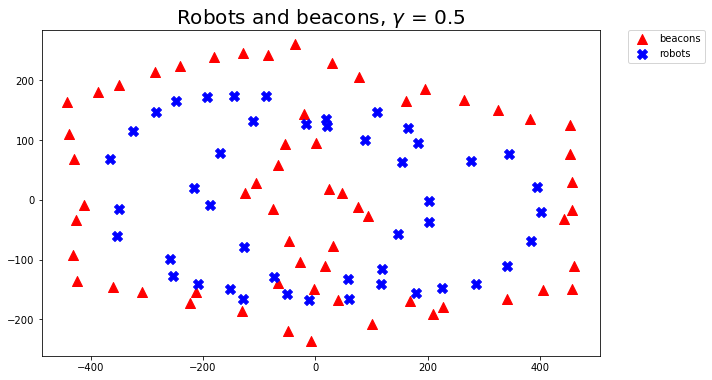

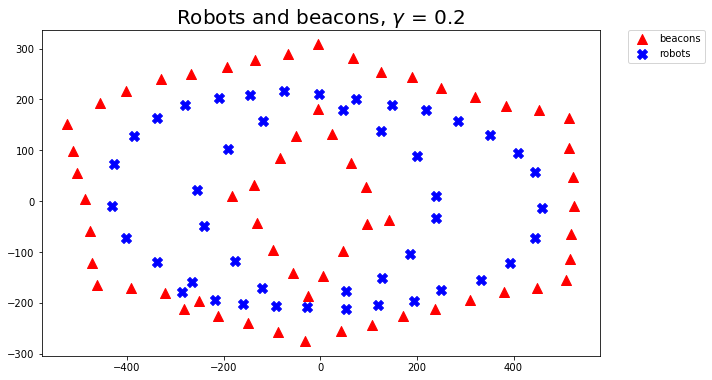

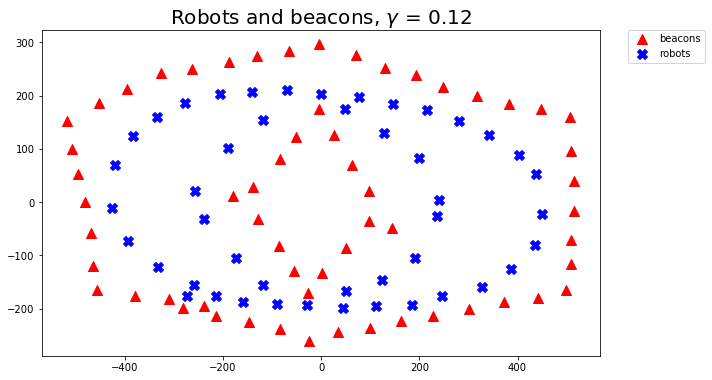

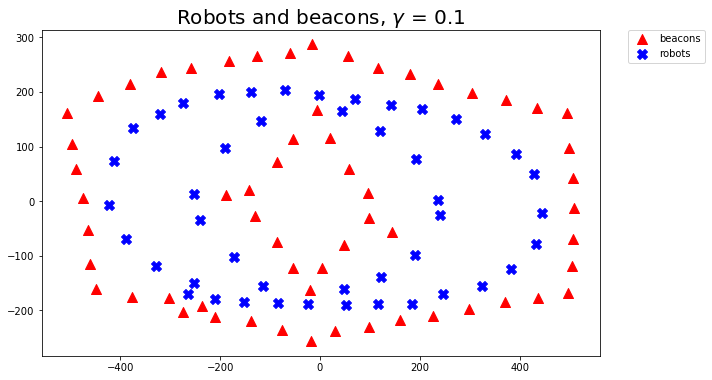

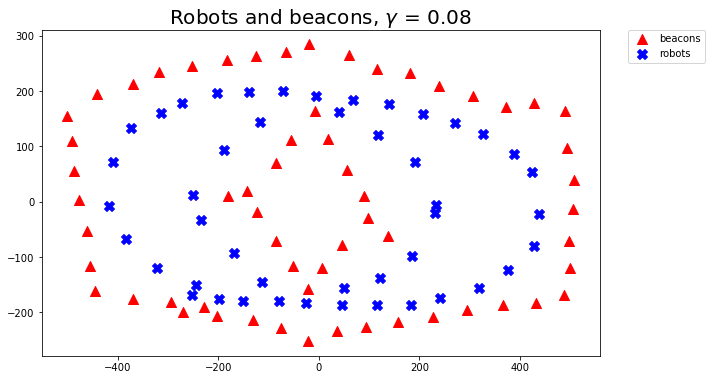

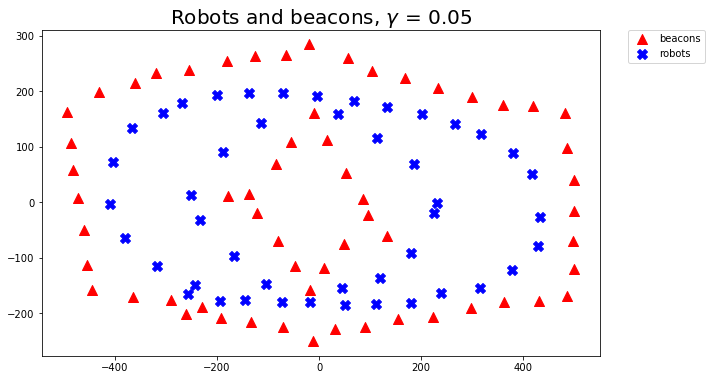

In [13]:
gammas = [0.5,0.2, 0.12,0.1,0.08,0.05]
for gam in gammas:
    w = opt.minimize(huber_f_log, w0, args=gam, method='BFGS', jac=grad_fun, options={'maxiter': 150}).x
    fig = plt.figure(figsize=(10,6))
    plt.title('Robots and beacons, $\gamma$ = %s'%gam, fontsize=20)
    plt.scatter(w[:B], w[B+R:2*B+R],s=100,marker='^', label='beacons', c='r')
    plt.scatter(w[B:B+R], w[2*B+R:2*B+2*R],s=100,marker='X',label='robots', c='b')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

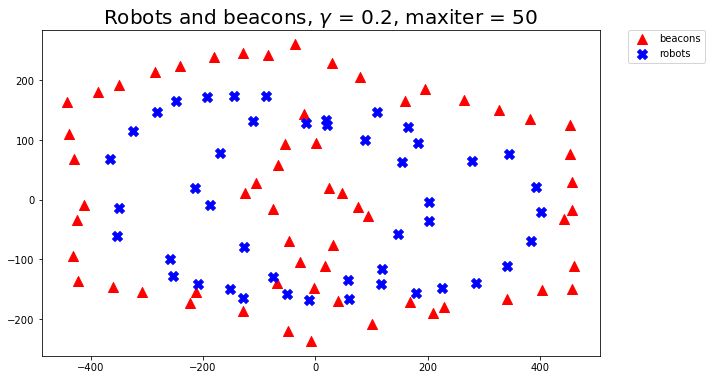

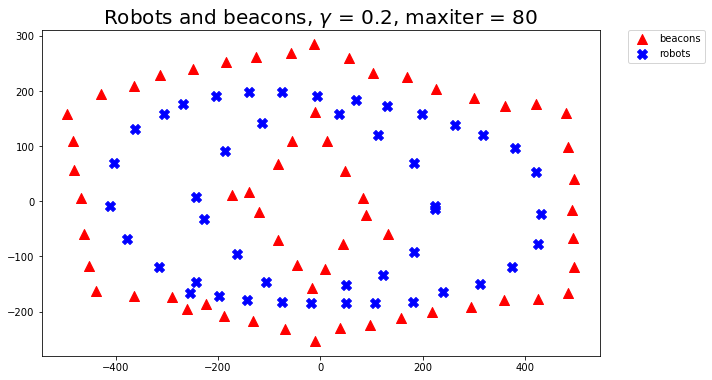

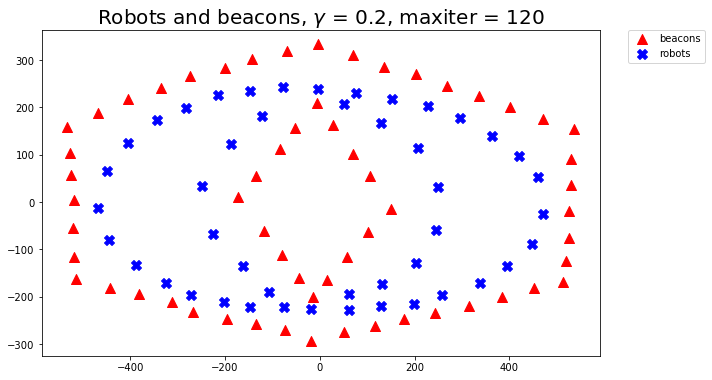

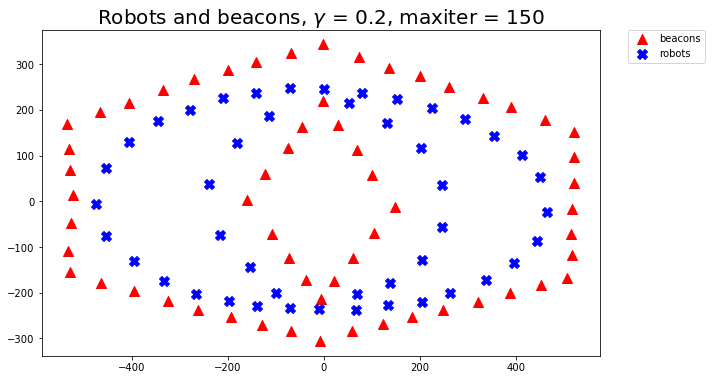

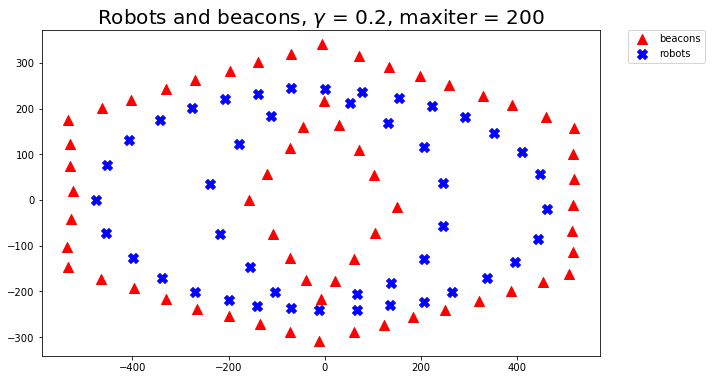

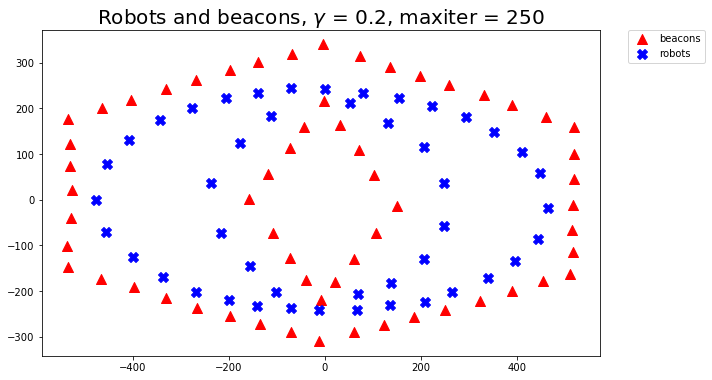

In [14]:
maxiter = [50,80,120,150,200,250]
for mi in maxiter:
    w = opt.minimize(huber_f, w0, args=0.2, method='BFGS', jac=grad_fun, options={'maxiter': mi}).x
    fig = plt.figure(figsize=(10,6))
    plt.title('Robots and beacons, $\gamma$ = 0.2, maxiter = %s'%mi, fontsize=20)
    plt.scatter(w[:B], w[B+R:2*B+R],s=100,marker='^', label='beacons', c='r')
    plt.scatter(w[B:B+R], w[2*B+R:2*B+2*R],s=100,marker='X',label='robots', c='b')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

The fastest: 

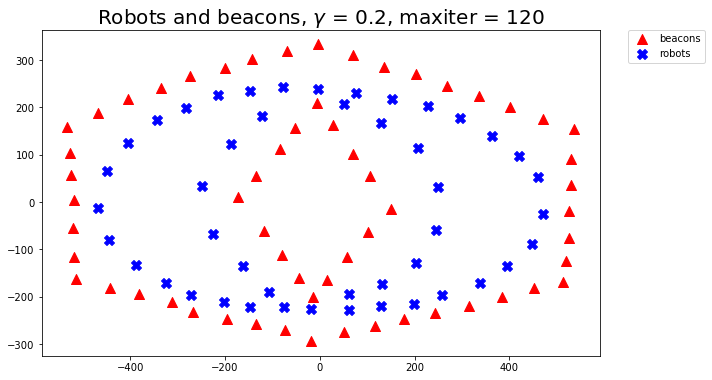

In [16]:
w = opt.minimize(huber_f, w0, args=0.2, method='BFGS', jac=grad_fun, options={'maxiter': 120}).x
fig = plt.figure(figsize=(10,6))
plt.title('Robots and beacons, $\gamma$ = 0.2, maxiter = 120', fontsize=20)
plt.scatter(w[:B], w[B+R:2*B+R],s=100,marker='^', label='beacons', c='r')
plt.scatter(w[B:B+R], w[2*B+R:2*B+2*R],s=100,marker='X',label='robots', c='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()